In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


from bs4 import BeautifulSoup

# For clustering
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

# Matplotlib and associated plotting modules

#import matplotlib.cm as cm
#import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


## Data acquisition from Wikipedia

This part follows a list of Parisian museums on Wikipedia and alternates between the French and English versions in order to obtain the geographical coordinates for all museums.

In [2]:
!conda list

# packages in environment at /opt/conda/envs/DSX-Python35:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.10           py35h6fb19ab_0  
anaconda-client           1.6.5            py35hd900ed1_0  
anaconda-project          0.8.0            py35hb597f32_0  
asn1crypto                0.22.0           py35h0d675fe_1  
astroid                   1.5.3            py35h1d0c565_0  
astropy                   2.0.2            py35h2d2a8a6_4  
astunparse                1.5.0                     <pip>
babel                     2.5.0            py35ha5fc564_0  
backports                 1.0              py35hd471ac7_1  
backports.shutil_get_terminal_size 1.0.0            py35h40844db_2  
backports.weakref         1.0rc1                   py35_0  
beautifulsoup4            4.6.0            py35h442a8c9_1  
biopython                 1.69                np113py35_0  
bitarray                  0.8.1            py35h14c3975_1  
bkcharts                 

In [3]:
def get_soup(url):
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data, 'html.parser')
    return soup

def find_french_page(soup):
    return soup.body.find_all("li", class_="interlanguage-link interwiki-fr")[0].a.get("href")

def get_latlong(coordinates):
    lat = float(coordinates[0][:-1]) + float(coordinates[1][:-1])/60 + float(coordinates[2][:-1])/3600
    long = float(coordinates[4][:-1]) + float(coordinates[5][:-1])/60 + float(coordinates[6][:-1])/3600
    return lat, long

In [4]:
soup = get_soup("https://en.wikipedia.org/wiki/List_of_museums_in_Paris")
df = pd.DataFrame(columns=['Museum name', 'Latitude', 'Longitude'])

In [5]:
for museum in soup.body.table.find_all('td')[::5]:
    try:
        museum_name = museum.a.get_text()
        museum_webpage = "https://en.wikipedia.org"+museum.a.get('href')
        if "redlink" not in museum_webpage:
            soup_museum = get_soup(museum_webpage)
            french_webpage = find_french_page(soup_museum)
            print(museum_name, french_webpage)    
            soup_french = get_soup(french_webpage)
            coordinates = soup_french.body.span.a.get_text().split()
            if len(coordinates) == 8:
                lat, long = get_latlong(coordinates)
                df = df.append({'Museum name': museum_name, 'Latitude':lat, 'Longitude':long}, ignore_index=True)
    except:
        pass
    
df.head(10)

Arab World Institute https://fr.wikipedia.org/wiki/Institut_du_monde_arabe
Archaeological Crypt of the Paris Notre-Dame https://fr.wikipedia.org/wiki/Cath%C3%A9drale_Notre-Dame_de_Paris
Art Ludique https://fr.wikipedia.org/wiki/Art_ludique_-_Le_Mus%C3%A9e
Bibliothèque-Musée de l'Opéra National de Paris https://fr.wikipedia.org/wiki/Biblioth%C3%A8que-mus%C3%A9e_de_l%27Op%C3%A9ra
Bibliothèque Polonaise de Paris https://fr.wikipedia.org/wiki/Biblioth%C3%A8que_polonaise_de_Paris
Cabinet des Médailles https://fr.wikipedia.org/wiki/D%C3%A9partement_des_Monnaies,_m%C3%A9dailles_et_antiques_de_la_Biblioth%C3%A8que_nationale_de_France
Catacombes de Paris https://fr.wikipedia.org/wiki/Catacombes_de_Paris
Cité de l'Architecture et du Patrimoine https://fr.wikipedia.org/wiki/Cit%C3%A9_de_l%27architecture_et_du_patrimoine
Cité des Sciences et de l'Industrie https://fr.wikipedia.org/wiki/Cit%C3%A9_des_sciences_et_de_l%27industrie
Cité nationale de l'histoire de l'immigration https://fr.wikipedia.org

,Museum name,Latitude,Longitude
0,Arab World Institute,48.849167,2.356944
1,Archaeological Crypt of the Paris Notre-Dame,48.853056,2.349722
2,Bibliothèque-Musée de l'Opéra National de Paris,48.871944,2.331111
3,Bibliothèque Polonaise de Paris,48.851389,2.355833
4,Cabinet des Médailles,48.867778,2.338333
5,Catacombes de Paris,48.833889,2.332222
6,Cité de l'Architecture et du Patrimoine,48.863056,2.289444
7,Cité des Sciences et de l'Industrie,48.895556,2.388056
8,Cité nationale de l'histoire de l'immigration,48.835278,2.409444
9,Espace Dalí,48.886667,2.339722


In [6]:
lat_paris, long_paris = df['Latitude'].mean(), df['Longitude'].mean()
print('Paris is at the coordinates (%s, %s).' % (lat_paris, long_paris))

Paris is at the coordinates (48.859524627720525, 2.330758877434135).


# Error
I did not manage to import the folium package in the latest execution of this notebook for unresolved reasons, so this map is unavailable. It is Figure no 1 in the associated docx report.

In [7]:
""""map_paris = folium.Map(location=[lat_paris, long_paris], zoom_start=12)

# add markers to map
for lat, lng, museum in zip(df['Latitude'], df['Longitude'], df['Museum name']):
    label = '{}'.format(museum)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris
"""


'"map_paris = folium.Map(location=[lat_paris, long_paris], zoom_start=12)\n\n# add markers to map\nfor lat, lng, museum in zip(df[\'Latitude\'], df[\'Longitude\'], df[\'Museum name\']):\n    label = \'{}\'.format(museum)\n    label = folium.Popup(label, parse_html=True)\n    folium.CircleMarker(\n        [lat, lng],\n        radius=5,\n        popup=label,\n        color=\'blue\',\n        fill=True,\n        fill_color=\'#3186cc\',\n        fill_opacity=0.7,\n        parse_html=False).add_to(map_paris)  \n    \nmap_paris\n'

As displayed by the map, we now have a list of geo-referenced museums in Paris.

## Data acquisition from the Foursquare API 

In this part, the Foursquare API is used to query which venues can be found around each of the museums.

In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
radius = 300
LIMIT = 200

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
museum_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
museum_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

museum_name = df.loc[0, 'Museum name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(museum_name, 
                                                               museum_latitude, 
                                                               museum_longitude))

Latitude and longitude values of Arab World Institute are 48.84916666666667, 2.3569444444444447.


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results if 'food' in v['venue']['categories'][0]['icon']['prefix']])

        # ADDED TEST TO ONLY CONSIDER THE VENUES IN THE "FOOD" CATEGORY
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Museum', 
                  'Museum Latitude', 
                  'Museum Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
museum_venues = getNearbyVenues(names=df['Museum name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Arab World Institute
Archaeological Crypt of the Paris Notre-Dame
Bibliothèque-Musée de l'Opéra National de Paris
Bibliothèque Polonaise de Paris
Cabinet des Médailles
Catacombes de Paris
Cité de l'Architecture et du Patrimoine
Cité des Sciences et de l'Industrie
Cité nationale de l'histoire de l'immigration
Espace Dalí
Fondation Cartier pour l'Art Contemporain
Galerie des Gobelins
Galerie nationale du Jeu de Paume
Institut Tessin
La Maison Rouge
Maison d'Auguste Comte
Maison de Balzac
Maison européenne de la photographie
Maison de Victor Hugo
Maison La Roche
Mémorial de la Shoah
Mona Bismarck American Center
Mundolingua
Musée – Librairie du Compagnonnage
Musée Adzak
Musée "Bible et Terre Sainte"
Musée Baccarat
Musée Bourdelle
Musée Carnavalet
Musée Cernuschi
Musée Clemenceau
Musée Curie
Musée d'Art Dentaire Pierre Fauchard
Musée d'Art et d'Histoire du Judaïsme
Musée d'Art Moderne de la Ville de Paris
Musée d'Art Naïf – Max Fourny
Musée d'Ennery
Musée d'Histoire Contemporaine
Musée d’h

## Data treatment

In this part, the data is cleaned and prepared for the classification section. I tried in particular to remove venue categories that are not restaurants, to combine small category sets into larger, more general ones, and to avoid duplicates due to language (ex: Bistro/Brasserie).

In [14]:
print('There are {} uniques categories.'.format(len(museum_venues['Venue Category'].unique())))

There are 127 uniques categories.


In [15]:
too_few_venues = museum_venues.groupby('Museum').count()['Museum Latitude'] < 10
too_few_venues = too_few_venues.reset_index()
for i,museum in too_few_venues.iterrows():
    if museum['Museum Latitude']:
        museum_venues.drop(museum_venues[museum_venues['Museum'] == museum['Museum']].index, inplace=True)
museum_venues.groupby('Museum').count().head(10) # verification


,Museum Latitude,Museum Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Museum,,,,,,
Arab World Institute,54,54,54,54,54,54
Archaeological Crypt of the Paris Notre-Dame,62,62,62,62,62,62
Bibliothèque Polonaise de Paris,51,51,51,51,51,51
Bibliothèque-Musée de l'Opéra National de Paris,42,42,42,42,42,42
Cabinet des Médailles,76,76,76,76,76,76
Catacombes de Paris,45,45,45,45,45,45
Cité de l'Architecture et du Patrimoine,26,26,26,26,26,26
Cité des Sciences et de l'Industrie,27,27,27,27,27,27
Cité nationale de l'histoire de l'immigration,11,11,11,11,11,11


I remove the generic "Restaurant" and "Diner" types because they do not provide enough information to be valuable here.

In [16]:
museum_venues.drop(museum_venues[museum_venues['Venue Category'] == 'Restaurant'].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'] == 'Diner'].index, inplace=True)

I remove supermarkets, stores, shops, markets and street food from the list.

In [17]:
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Store')].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Shop')].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Supermarket')].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Street Food')].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Food Truck')].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Food Court')].index, inplace=True)
museum_venues.drop(museum_venues[museum_venues['Venue Category'].str.contains('Market')].index, inplace=True)

For restaurants types with less than 3 entries, I reclassified them into more general categories so that they have a more meaningful impact on the classification. 

In [18]:
museum_venues.replace('Organic Grocery', 'Grocery Store',inplace=True)
museum_venues.replace('South American Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Caribbean Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Venezuelan Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Peruvian Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Argentinian Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Arepa Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Empanada Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Brazilian Restaurant', 'Latin American Restaurant',inplace=True)
museum_venues.replace('Romanian Restaurant', 'Eastern European Restaurant',inplace=True)
museum_venues.replace('Russian Restaurant', 'Eastern European Restaurant',inplace=True)
museum_venues.replace('Taiwanese Restaurant', 'Asian Restaurant',inplace=True)
museum_venues.replace('Doner Restaurant', 'Turkish Restaurant',inplace=True)
museum_venues.replace('Persian Restaurant', 'Middle Eastern Restaurant',inplace=True)
museum_venues.replace('Afghan Restaurant', 'Middle Eastern Restaurant',inplace=True)
museum_venues.replace('Champagne Bar', 'Wine Bar',inplace=True)
museum_venues.replace('Wine bar', 'Wine Bar',inplace=True)
museum_venues.replace('Hot Dog Joint', 'Fast Food Restaurant',inplace=True)
museum_venues.replace('Snack Place', 'Fast Food Restaurant',inplace=True)
museum_venues.replace('Ethiopian Restaurant', 'African Restaurant',inplace=True)
museum_venues.replace('Cantonese Restaurant', 'Chinese Restaurant',inplace=True)
museum_venues.replace('Dim Sum Restaurant', 'Chinese Restaurant',inplace=True)
museum_venues.replace('Udon Restaurant', 'Japanese Restaurant',inplace=True)
museum_venues.replace('Soba Restaurant', 'Japanese Restaurant',inplace=True)
museum_venues.replace('Okonomiyaki Restaurant', 'Japanese Restaurant',inplace=True)
museum_venues.replace('Sushi Restaurant', 'Japanese Restaurant',inplace=True)
museum_venues.replace('Taco Place', 'Mexican Restaurant',inplace=True)
museum_venues.replace('Brewery', 'Bistro',inplace=True)
museum_venues.replace('BBQ Joint', 'Steakhouse',inplace=True)
museum_venues.replace('Poke Place', 'Seafood Restaurant',inplace=True)
museum_venues.replace('Portuguese Restaurant', 'Mediterranean Restaurant',inplace=True)


I fuse categories that are really similar.

In [19]:
museum_venues.replace('Brasserie', 'Bistro',inplace=True)
museum_venues.replace('Savoyard Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Provençal Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Burgundian Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Alsatian Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace("Ch'ti Restaurant", 'Regional French Restaurant',inplace=True)
museum_venues.replace('Breton Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Basque Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Auvergne Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Corsican Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Lyonese Bouchon', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Southwestern French Restaurant', 'Regional French Restaurant',inplace=True)
museum_venues.replace('Belgian Restaurant', 'Regional French Restaurant',inplace=True) # arbitrary 
museum_venues.replace('English Restaurant', 'Tea Room',inplace=True) # must be the same, there is no good food in England # joke 
museum_venues.replace('Ramen Restaurant', 'Noodle House',inplace=True)
museum_venues.replace('Falafel Restaurant', 'Lebanese Restaurant',inplace=True)
museum_venues.replace('Szechuan Restaurant', 'Chinese Restaurant',inplace=True)

In [20]:
museum_venues.groupby('Venue Category').count()['Museum'].sort_values()

Venue Category
Grocery Store                         1
Indonesian Restaurant                 1
Molecular Gastronomy Restaurant       3
Spanish Restaurant                    5
Cambodian Restaurant                  5
Gluten-free Restaurant                6
Comfort Food Restaurant               6
Eastern European Restaurant           9
Cajun / Creole Restaurant             9
Juice Bar                             9
Israeli Restaurant                   10
Modern European Restaurant           10
New American Restaurant              12
Turkish Restaurant                   12
Fast Food Restaurant                 13
Jewish Restaurant                    13
Scandinavian Restaurant              14
African Restaurant                   14
Breakfast Spot                       15
American Restaurant                  16
Greek Restaurant                     18
Salad Place                          19
Moroccan Restaurant                  19
Middle Eastern Restaurant            21
Mediterranean Restaurant 

This list could always be refined, for instance by combining restaurants from all over the world into categories by continents. 

In [21]:
print('There are {} uniques categories.'.format(len(museum_venues['Venue Category'].unique())))

There are 54 uniques categories.


In [22]:
# one hot encoding
museum_onehot = pd.get_dummies(museum_venues[['Venue Category']], prefix="", prefix_sep="")

# add museum column back to dataframe
museum_onehot['Museum'] = museum_venues['Museum'] 

# move museum column to the first column
fixed_columns = [museum_onehot.columns[-1]] + list(museum_onehot.columns[:-1])
museum_onehot = museum_onehot[fixed_columns]
museum_grouped = museum_onehot.groupby('Museum').mean().reset_index()

In [23]:
num_top_venues = 5

for mus in museum_grouped['Museum'][:5]:
    print("----"+mus+"----")
    temp = museum_grouped[museum_grouped['Museum'] == mus].T.reset_index()
    temp.columns = ['Venue category','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    display(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))

----Arab World Institute----


,Venue category,Frequency
0,French Restaurant,0.30
1,Bistro,0.11
2,Café,0.07
3,Japanese Restaurant,0.07
4,Creperie,0.07


----Archaeological Crypt of the Paris Notre-Dame----


,Venue category,Frequency
0,French Restaurant,0.40
1,Creperie,0.12
2,Bakery,0.08
3,Bistro,0.04
4,Japanese Restaurant,0.04


----Bibliothèque Polonaise de Paris----


,Venue category,Frequency
0,French Restaurant,0.44
1,Wine Bar,0.07
2,Creperie,0.05
3,Japanese Restaurant,0.05
4,Bakery,0.05


----Bibliothèque-Musée de l'Opéra National de Paris----


,Venue category,Frequency
0,French Restaurant,0.37
1,Sandwich Place,0.11
2,Salad Place,0.07
3,Italian Restaurant,0.07
4,Regional French Restaurant,0.04


----Cabinet des Médailles----


,Venue category,Frequency
0,Japanese Restaurant,0.23
1,French Restaurant,0.21
2,Bistro,0.09
3,Korean Restaurant,0.08
4,Italian Restaurant,0.08


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Here a possible issue is visible: for most museums, the most present type of venue is "French restaurant". Paris being Paris, this was to be expected, but it might skew the data. We will have to pay close attention to the clusters created by the k-means algorithm and verify that they are not disproportionately affected by this issue.

## Clustering

In [25]:
import matplotlib.pyplot as plt

In [26]:
# set number of clusters
#kclusters = 4

museum_grouped_clustering = museum_grouped.drop('Museum', 1)
sse = {}
# run k-means clustering
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(museum_grouped_clustering)
    sse[k] = kmeans.inertia_


    

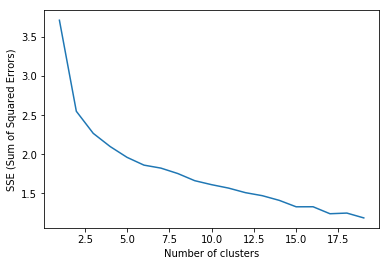

In [27]:
plt.figure()
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

In [ ]:
# set number of clusters
kclusters = 4

museum_grouped_clustering = museum_grouped.drop('Museum', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(museum_grouped_clustering)



In [ ]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Museum']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
museum_venues_sorted = pd.DataFrame(columns=columns)
museum_venues_sorted['Museum'] = museum_grouped['Museum']

for ind in np.arange(museum_grouped.shape[0]):
    museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(museum_grouped.iloc[ind, :], num_top_venues)

museum_venues_sorted.head(10)

In [ ]:
# add clustering labels
museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

museum_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
museum_merged = museum_merged.join(museum_venues_sorted.set_index('Museum'), on='Museum name')

museum_merged.dropna(inplace=True)# check the last columns!
museum_merged.head()

In [ ]:
num_top_venues = 5

def return_most_venues_per_cluster(cluster_value):
    for mus in museum_grouped['Museum']:
        if str(museum_merged[museum_merged['Museum name'] == mus]['Cluster Labels'].get_values()[0]) == str(cluster_value):
            print("----"+mus+"----")
            temp = museum_grouped[museum_grouped['Museum'] == mus].T.reset_index()
            temp.columns = ['Venue category','Frequency']
            temp = temp.iloc[1:]
            temp['Frequency'] = temp['Frequency'].astype(float)
            temp = temp.round({'Frequency': 2})
            #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
            #print('\n')
            display(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))

### This cluster no 0 contains French Restaurants around 25%, and a lot of Italian (10-20%) and Japanese (around 10%). Let's label it "French/Italian/Japanese".

In [ ]:
return_most_venues_per_cluster(0.0)

### This cluster no 1 contains mostly French Restaurants (around 50%), and a lot of Cafés and Bistros. Let's label it "Traditional French".

In [ ]:
return_most_venues_per_cluster(1.0)

### This cluster no 2 is much more diverse than the others, with more restaurants from Asia or the rest of the World. Let's label it "Cosmopolitan".

In [ ]:
return_most_venues_per_cluster(2.0)

### This cluster no 3 contains around 30% of French Restaurants, and Bakeries are coming up more often than in other clustrs. Let's label it "Baguette zone".

In [ ]:
return_most_venues_per_cluster(3.0)

In [ ]:
# create map
map_clusters = folium.Map(location=[lat_paris, long_paris], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['blue', 'red', 'black', 'orange', 'yellow']
labels = [ 'French/Italian/Japanese', 'Traditional French','Cosmopolitan', 'Baguette zone']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(museum_merged['Latitude'], museum_merged['Longitude'], museum_merged['Museum name'], museum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' -- Type of food : ' + labels[int(cluster)], parse_html=True)
    #label = folium.Popup(str(poi) + ' -- Type of food : ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

If we inspect the different clusters on this map, we can recognize some Parisian neighbourhoods, which corroborates the classification obtained by the k-means algorithm.

For instance:
  1. The "Traditional French" zone is mostly around the Eiffel Tower, the Louvre and the Orsay Museum. These high-end areas feature more traditional French restaurants. 
  2. The "Baguette zone" corresponds to popular zones such as the student neighbourhood of Paris-Dauphine and the Pigalle-Montmartre neighbourhood. An increased presence of bakeries and cheap restauration options in popular areas seems plausible.
  3. The "Cosmopolitan" area can especially be found in the Marais which is a gentrified, diverse neighbourhood. In this area, restaurants from all over the world are more readily found.
  4. The "French/Italian/Japanese" zone can mostly be found in the periphery of Paris and in the neighbourhood of Saint-Germain-des-Prés. These are areas which have included Italian (pizzas) and Japanese (sushis) cuisine into their main preferences.